In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [40]:
data = pd.read_csv('./data/uci-heart-disease/cleveland-cleaned.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [41]:
data['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

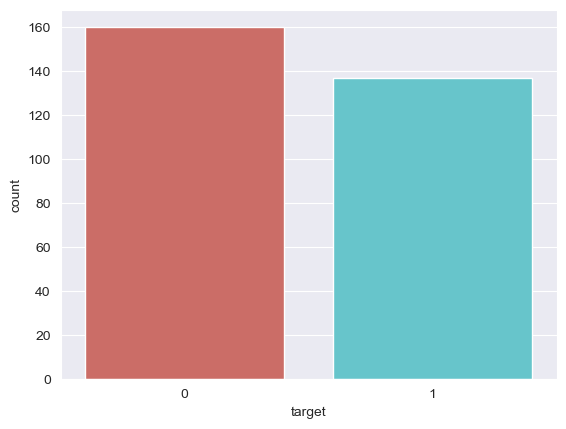

In [42]:
# class distribution
data['target'].value_counts()
sns.countplot(x='target', data=data, palette='hls')
plt.show()
# plt.savefig('target');

In [43]:
X = data.drop('target', axis=1)
y = data['target']

In [44]:
y

0      0
1      1
2      1
3      0
4      0
      ..
292    1
293    1
294    1
295    1
296    1
Name: target, Length: 297, dtype: int64

In [22]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [23]:
X

array([[ 0.93618065,  0.69109474, -2.24062879, ...,  2.26414539,
        -0.72197605,  0.65587737],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         2.47842525, -0.89422007],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       ...,
       [ 1.48961547,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       [ 0.27205887,  0.69109474,  0.87388018, ...,  0.6437811 ,
         0.34482438,  1.17257652],
       [ 0.27205887, -1.44697961, -1.20245913, ...,  0.6437811 ,
         0.34482438, -0.89422007]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [25]:
X_test[0:5]

array([[-0.28137595,  0.69109474, -2.24062879, -0.77221549, -1.18185712,
        -0.41145029,  1.01019851,  1.76399759, -0.69641941, -0.90671163,
         0.6437811 , -0.72197605,  0.65587737],
       [-1.38824559, -1.44697961,  0.87388018, -1.67449433,  0.34000851,
        -0.41145029,  1.01019851, -1.20505778, -0.69641941, -0.39131765,
         0.6437811 , -0.72197605, -0.89422007],
       [ 0.1613719 ,  0.69109474, -0.16428947, -0.09550637,  0.16663141,
         2.43042728,  1.01019851, -0.3318062 ,  1.43591632, -0.39131765,
         0.6437811 ,  0.34482438,  0.65587737],
       [ 0.49343279,  0.69109474,  0.87388018,  0.35563305,  0.45559324,
        -0.41145029,  1.01019851,  1.41469696, -0.69641941, -0.90671163,
        -0.97658319, -0.72197605, -0.89422007],
       [ 0.49343279,  0.69109474, -1.20245913,  0.46841791, -0.50761285,
        -0.41145029, -1.00341866,  0.62877054,  1.43591632, -0.90671163,
        -0.97658319, -0.72197605, -0.89422007]])

In [26]:
y_test.head()

111    0
150    0
12     1
216    0
139    0
Name: target, dtype: int64

### Base model

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
svc= SVC()
svc.fit(X_train, y_train)
y_p = svc.predict(X_test)
acc=accuracy_score(y_test, y_p)*100
print("SVM - Accuracy: {:.3f}.".format(acc))
print("\nClassification Report")
print(classification_report(y_test, y_p))

SVM - Accuracy: 83.333.

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



### Tuned model

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from numpy import arange
grid_svc= SVC()

parameters = dict()
parameters['kernel'] = ['rbf', 'poly', 'linear', 'sigmoid']
parameters['C'] = arange(1, 10, 1)
parameters['gamma'] = ['scale', 'auto']
parameters['class_weight'] = ['dict', 'balanced']

## Building Grid Search algorithm with cross-validation and acc score.

# grid_search_svc = GridSearchCV(grid_svc, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_svc = GridSearchCV(grid_svc, parameters, scoring='accuracy', cv=5)

grid_search_svc.fit(X_train,y_train)
best_parameters_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_
print(best_parameters_svc)
print(best_score_svc)

y_pred = grid_search_svc.predict(X_test)

# Get the accuracy score
svc_acc=accuracy_score(y_test, y_pred)*100
svc_pre=precision_score(y_test, y_pred, average='micro')
svc_recall=recall_score(y_test, y_pred, average='micro')
svc_f1_=f1_score(y_test, y_pred, average='micro')

print("\nSVM - Accuracy: {:.3f}.".format(svc_acc))
print("SVM - Precision: {:.3f}.".format(svc_pre))
print("SVM - Recall: {:.3f}.".format(svc_recall))
print("SVM - F1_Score: {:.3f}.".format(svc_f1_))
print("\nClassification Report")
print(classification_report(y_test, y_pred))

{'C': 6, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'sigmoid'}
0.8566489361702129

SVM - Accuracy: 80.000.
SVM - Precision: 0.800.
SVM - Recall: 0.800.
SVM - F1_Score: 0.800.

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60

